# **<center>==============</center>**
# **<center>Bank Churners</center>**
# **<center>==============</center>**

##  Imports library and Module

In [1]:
# necessary imports librarys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# additional imports for machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingClassifier

## Loading, Preprocessing, EDA

In [3]:
# Load and clean dataset
df = pd.read_csv("Bankchurners.csv")
cols_to_drop = ['CLIENTNUM', df.columns[-2], df.columns[-1]]
df = df.drop(columns=cols_to_drop)


In [4]:
# Preprocessing

df['Attrition_Flag'] = df['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

# One-Hot Encoding for categorical features
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

<Figure size 1000x600 with 0 Axes>

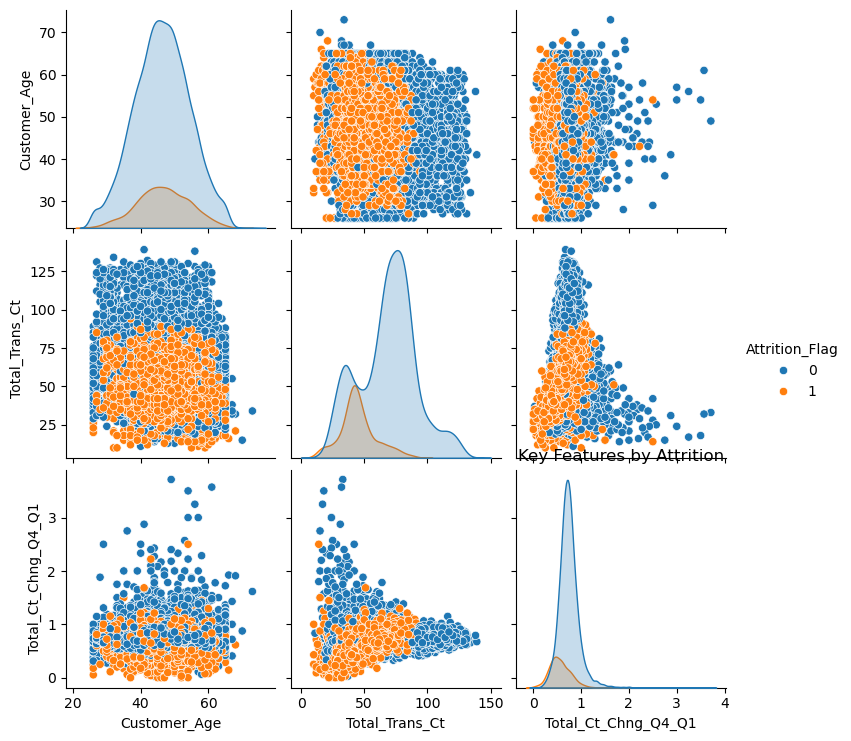

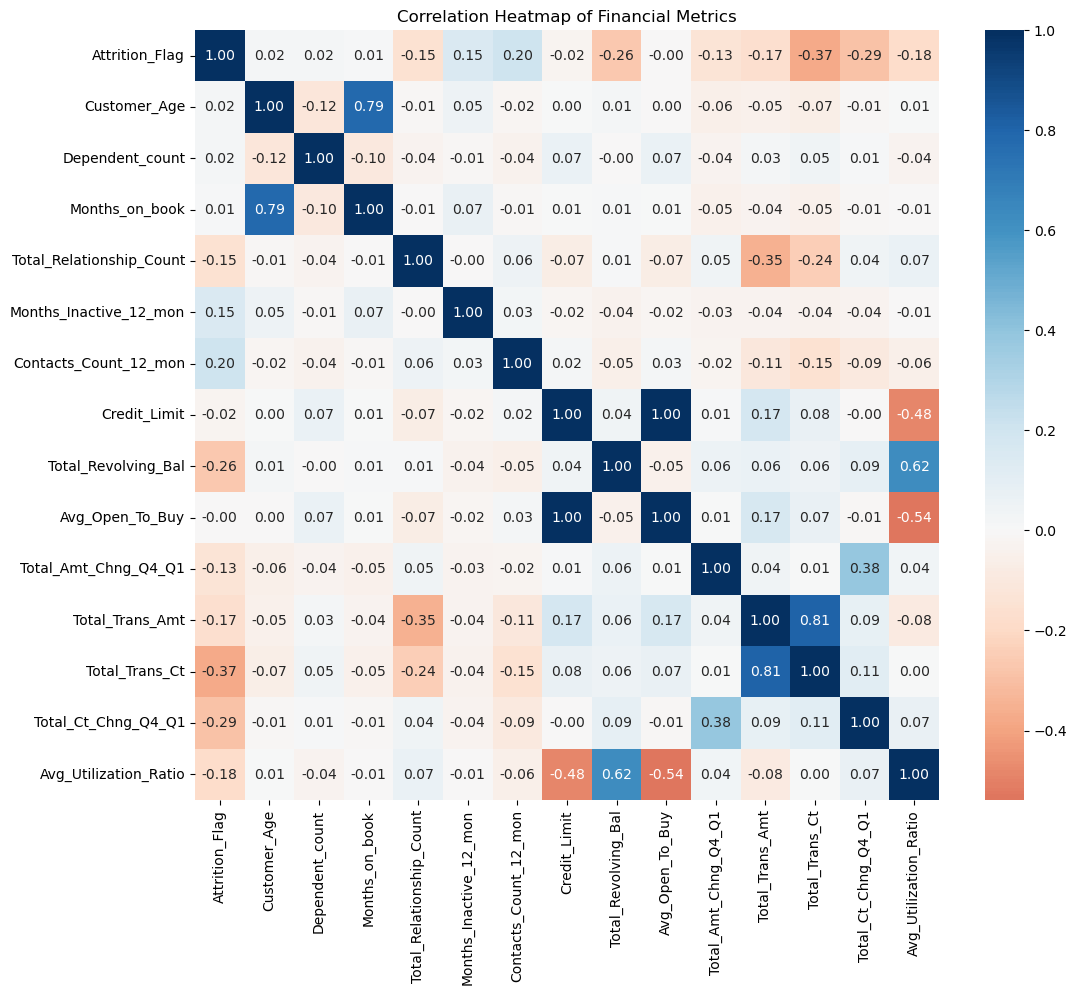

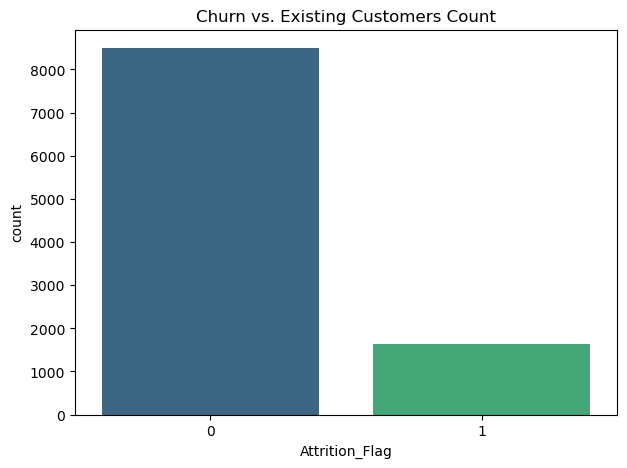

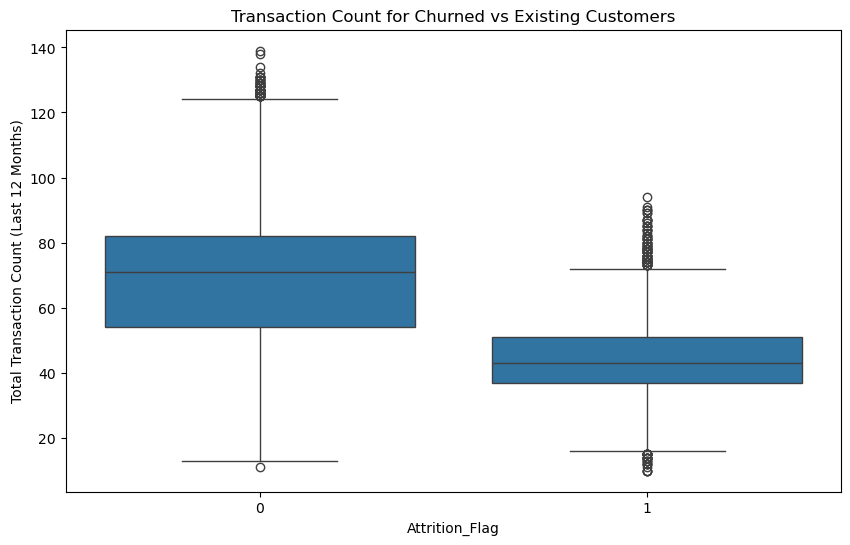

In [5]:
# --- A. Pairplot of Key Features ---
plt.figure(figsize=(10, 6))
sns.pairplot(df[['Customer_Age', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Attrition_Flag']], hue='Attrition_Flag')
plt.title('Key Features by Attrition')
plt.show()

# --- B. Correlation Heatmap ---
plt.figure(figsize=(12, 10))
numeric_df = df.select_dtypes(include=[np.number]).drop(columns=['CLIENTNUM'], errors='ignore')
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='RdBu', center=0)
plt.title('Correlation Heatmap of Financial Metrics')
plt.show()

# --- C. Target Variable Distribution ---
plt.figure(figsize=(7, 5))
sns.countplot(x='Attrition_Flag', data=df, palette='viridis')
plt.title('Churn vs. Existing Customers Count')
plt.show()

# --- D. Key Behavior: Transactions vs Churn ---
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition_Flag', y='Total_Trans_Ct', data=df)
plt.title('Transaction Count for Churned vs Existing Customers')
plt.ylabel('Total Transaction Count (Last 12 Months)')
plt.show()

## Split & Train/Test

In [6]:
# Split features and target
X = df_encoded.drop('Attrition_Flag', axis=1)
y = df_encoded['Attrition_Flag']

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling (Crucial for Logistic Regression and SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Result & Model ResultGraphs

In [7]:
# Model Training & Evaluation
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(probability=True)
}

for name, model in models.items():
    # Use scaled data for LR and SVM, raw data is fine for Tree-based models
    X_train_run = X_train_scaled if name in ["Logistic Regression", "SVM"] else X_train
    X_test_run = X_test_scaled if name in ["Logistic Regression", "SVM"] else X_test
    
    model.fit(X_train_run, y_train)
    y_pred = model.predict(X_test_run)
    
    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))

--- Logistic Regression ---
Accuracy: 0.8998
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1701
           1       0.77      0.54      0.63       325

    accuracy                           0.90      2026
   macro avg       0.84      0.75      0.79      2026
weighted avg       0.89      0.90      0.89      2026

--- Random Forest ---
Accuracy: 0.9551
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1701
           1       0.94      0.77      0.85       325

    accuracy                           0.96      2026
   macro avg       0.95      0.88      0.91      2026
weighted avg       0.95      0.96      0.95      2026

--- Gradient Boosting ---
Accuracy: 0.9640
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1701
           1       0.96      0.81      0.88       325

    accuracy                           0.96      2026
 

<Figure size 800x600 with 0 Axes>

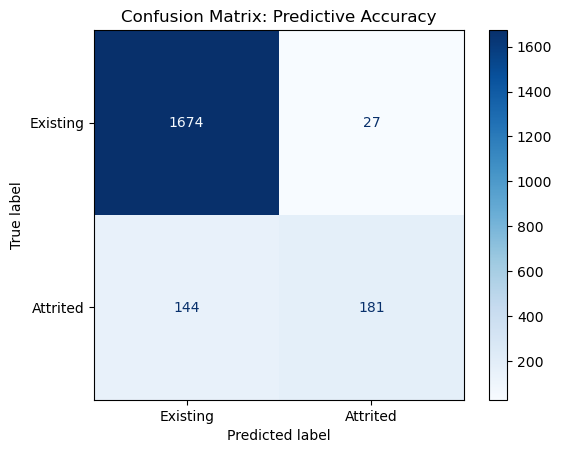

In [8]:
# 1. Confusion Matrix for the best model ---
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Existing', 'Attrited'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix: Predictive Accuracy')
plt.show()

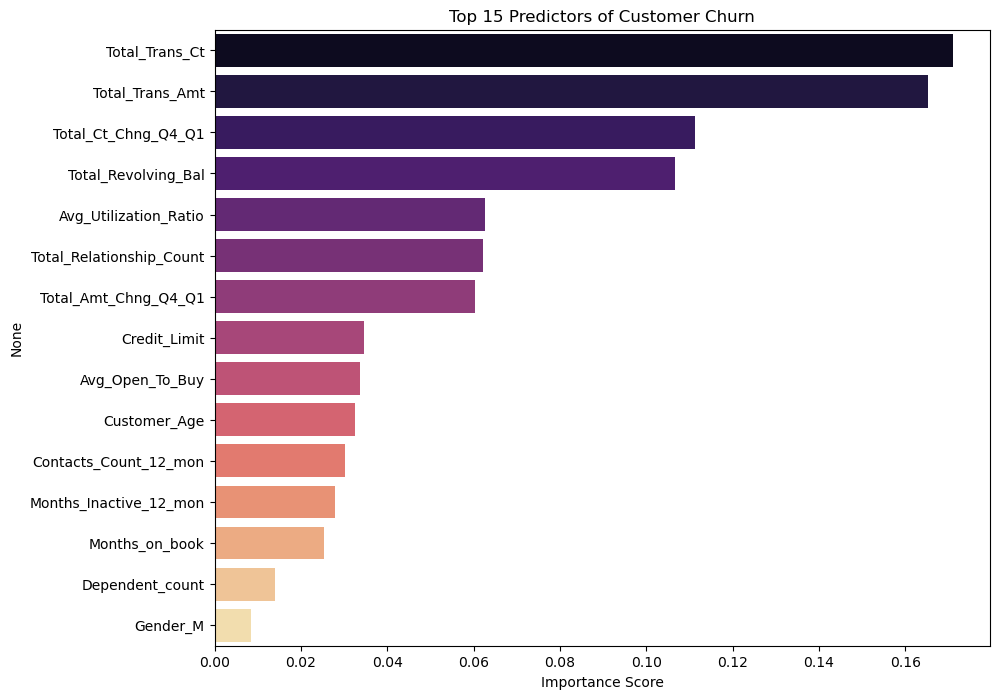

In [9]:
# 2. Feature Importance Plot ---
tree_model = models["Random Forest"]
tree_model.fit(X_train, y_train)
importances = pd.Series(tree_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x=importances.head(15), y=importances.head(15).index, palette='magma')
plt.title('Top 15 Predictors of Customer Churn')
plt.xlabel('Importance Score')
plt.show()